## START

In [2]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import warnings
warnings.filterwarnings('ignore')
import matplotlib.pyplot as plt
import matplotlib
# visualisation
%matplotlib inline
matplotlib.style.use('ggplot')
import seaborn as sns
sns.set_style("whitegrid")

In [3]:
#Load Data and encode to latin
acc = pd.read_csv('/Users/vissea01/Downloads/Accident_Information.csv', encoding = 'latin')
veh = pd.read_csv('/Users/vissea01/Downloads/Vehicle_Information.csv', encoding = 'latin')

# Merging two data sets into one with inner join by index
df = pd.merge(veh, acc, how = 'inner', on = 'Accident_Index')

#Check data sample
print(df.shape)
df.head()

(2058408, 57)


,Accident_Index,Age_Band_of_Driver,Age_of_Vehicle,Driver_Home_Area_Type,Driver_IMD_Decile,Engine_Capacity_.CC.,Hit_Object_in_Carriageway,Hit_Object_off_Carriageway,Journey_Purpose_of_Driver,Junction_Location,...,Police_Force,Road_Surface_Conditions,Road_Type,Special_Conditions_at_Site,Speed_limit,Time,Urban_or_Rural_Area,Weather_Conditions,Year_y,InScotland
0,200501BS00002,36 - 45,3.0,Data missing or out of range,NaN,8268.0,None,None,Journey as part of work,Leaving roundabout,...,Metropolitan Police,Dry,Dual carriageway,None,30.0,17:36,Urban,Fine no high winds,2005,No
1,200501BS00003,26 - 35,5.0,Urban area,3.0,8300.0,Parked vehicle,None,Journey as part of work,Not at or within 20 metres of junction,...,Metropolitan Police,Dry,Single carriageway,None,30.0,00:15,Urban,Fine no high winds,2005,No
2,200501BS00004,46 - 55,4.0,Urban area,1.0,1769.0,None,None,Other/Not known (2005-10),Not at or within 20 metres of junction,...,Metropolitan Police,Dry,Single carriageway,None,30.0,10:35,Urban,Fine no high winds,2005,No
3,200501BS00005,46 - 55,10.0,Data missing or out of range,NaN,85.0,Kerb,None,Other/Not known (2005-10),Not at or within 20 metres of junction,...,Metropolitan Police,Wet or damp,Single carriageway,None,30.0,21:13,Urban,Fine no high winds,2005,No
4,200501BS00006,46 - 55,1.0,Urban area,4.0,2976.0,None,None,Other/Not known (2005-10),Not at or within 20 metres of junction,...,Metropolitan Police,Wet or damp,Single carriageway,Oil or diesel,30.0,12:40,Urban,Raining no high winds,2005,No


In [57]:
df['Accident_Severity'].replace({'Fatal':2, 'Serious':1, 'Slight':0}, inplace=True, regex=True)

In [117]:
df.to_csv('/Users/vissea01/Downloads/r_a_uk_data.csv')

In [45]:
def get_features(df):
    for col in df.columns:
        print(col)
get_features(df)

Accident_Index
Age_Band_of_Driver
Age_of_Vehicle
Driver_Home_Area_Type
Driver_IMD_Decile
Engine_Capacity_.CC.
Hit_Object_in_Carriageway
Hit_Object_off_Carriageway
Journey_Purpose_of_Driver
Junction_Location
make
model
Propulsion_Code
Sex_of_Driver
Skidding_and_Overturning
Towing_and_Articulation
Vehicle_Leaving_Carriageway
Vehicle_Location.Restricted_Lane
Vehicle_Manoeuvre
Vehicle_Reference
Vehicle_Type
Was_Vehicle_Left_Hand_Drive
X1st_Point_of_Impact
Year_x
1st_Road_Class
1st_Road_Number
2nd_Road_Class
2nd_Road_Number
Accident_Severity
Carriageway_Hazards
Date
Day_of_Week
Did_Police_Officer_Attend_Scene_of_Accident
Junction_Control
Junction_Detail
Latitude
Light_Conditions
Local_Authority_(District)
Local_Authority_(Highway)
Location_Easting_OSGR
Location_Northing_OSGR
Longitude
LSOA_of_Accident_Location
Number_of_Casualties
Number_of_Vehicles
Pedestrian_Crossing-Human_Control
Pedestrian_Crossing-Physical_Facilities
Police_Force
Road_Surface_Conditions
Road_Type
Special_Conditions_at_

#### Types of features

In [46]:
def count_features(df):
    count = df.dtypes.value_counts()
    print('This data set contains:')
    c=0
    for i in count.index:
        if i == 'object':
            print('Number of categorical features: ', count[i])
        if i == 'float64':
            c=count[i]
        if i == 'int64':
            c += count[i]
    print('Number of numerical features: ', c)
count_features(df)

This data set contains:
Number of categorical features:  38
Number of numerical features:  19


#### Sample data

In [124]:
def sample(df):
    sample = df.sample(40000)
    return sample
sample = sample(df)
sample.shape

(40000, 58)

In [125]:
sample.to_csv('/Users/vissea01/Downloads/sample_data.csv')

#### Drop missing data point

In [43]:
def drop_nan(df):
    df = df.dropna()
    return(df)
sample = drop_nan(sample)

In [113]:
def draw_simple_chart(df,att1,att2):
    g=df.groupby(att1)[[att2]].count()
    g.reset_index(inplace=True)
    fig, ax = plt.subplots(figsize=(20, 8))
    plt.xticks(rotation=90)
    g = sns.barplot(x=att1,y=att2,data=g, color='#44083e')
    plt.tick_params(
        axis='x',          # changes apply to the x-axis
        which='both',      # both major and minor ticks are affected
        bottom=False,      # ticks along the bottom edge are off
        top=False,         # ticks along the top edge are off
        #labelbottom=False
    ) # labels along the bottom edge are off

    ax.set(xlabel=att1, ylabel='Count') #rename y
    ax.grid(False)
    #plt.tight_layout() # or fig.tight_layout() to avoid cutting x-labels when saving png
    #plt.show()
    fig.savefig('png/graph.png')

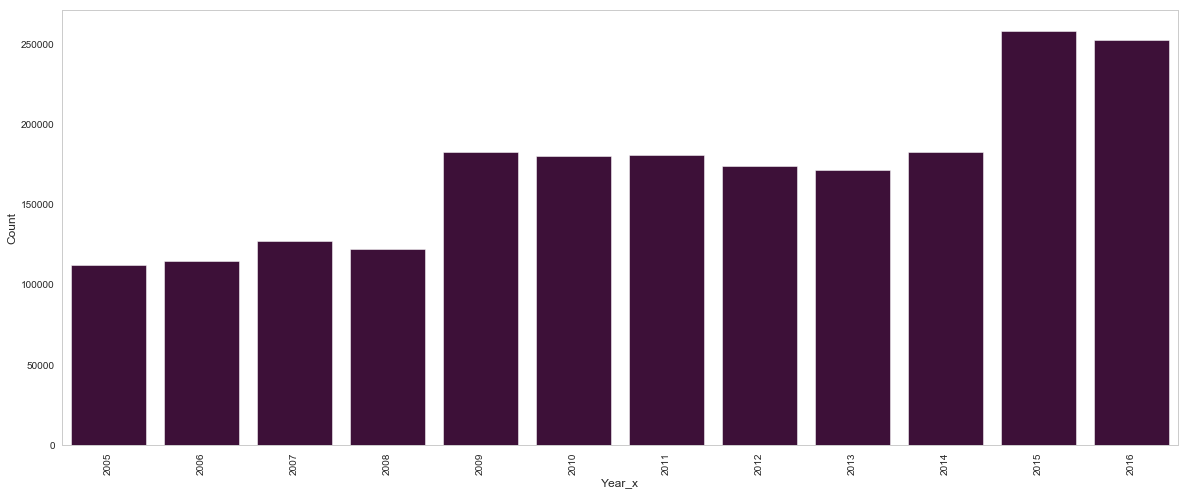

In [114]:
draw_simple_chart(df,'Year_x','Accident_Index')

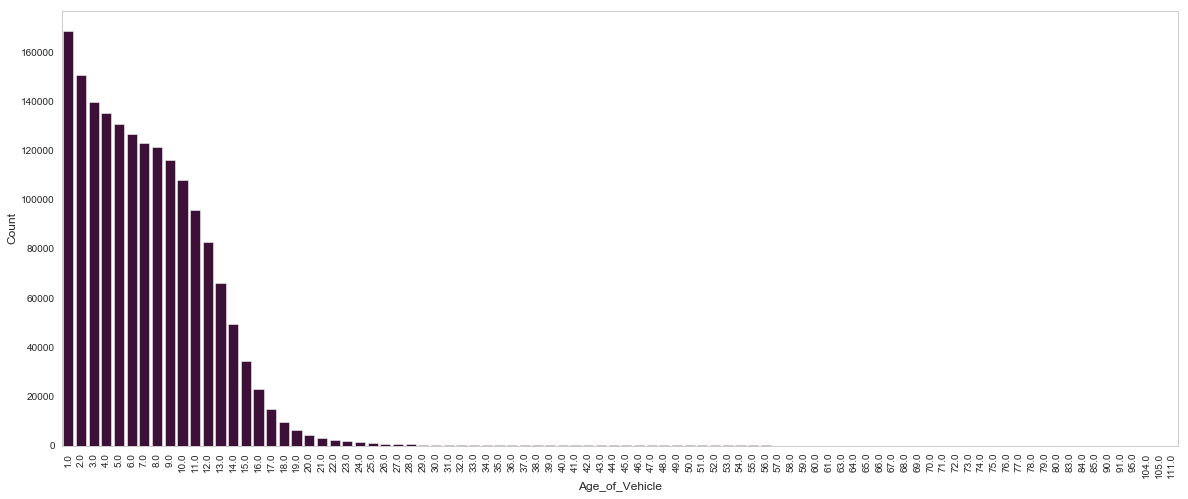

In [115]:
draw_simple_chart(df,'Age_of_Vehicle','Accident_Index')

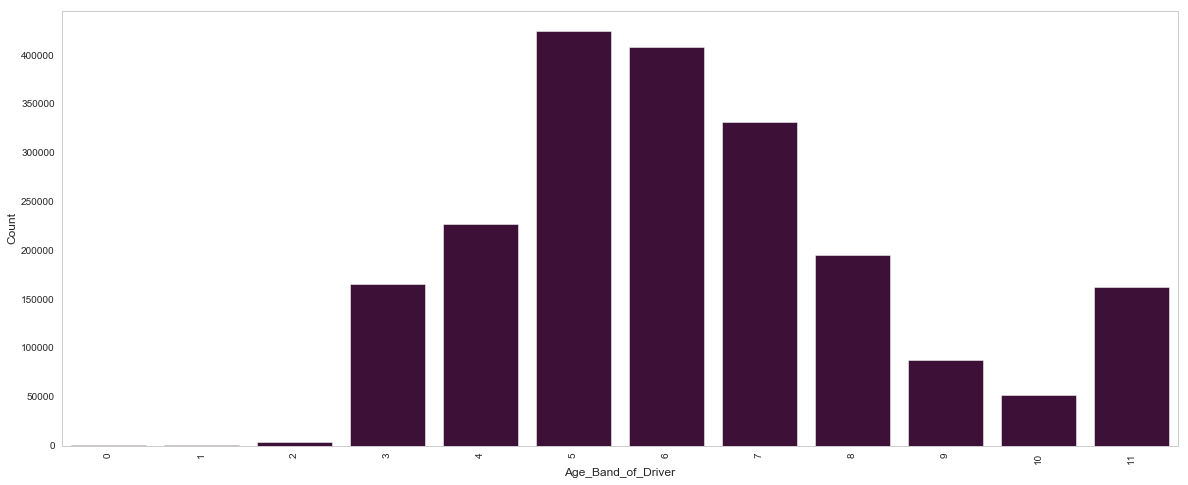

In [116]:
draw_simple_chart(df,'Age_Band_of_Driver','Accident_Index')

In [110]:
def plot_corr(df, att1, att2, att3, att4, att5, att6):
    #, att6, att7, att8, att9, att10
    df1 = df[[att1, att2, att3, att4, att5, att6]]
    corr = df1.corr()
    fig, ax = plt.subplots(figsize=(8, 8))
    cax = ax.matshow(df1, interpolation='nearest')
    ax.matshow(corr)
    fig.colorbar(cax)
    plt.xticks(range(len(corr.columns)), corr.columns);
    plt.yticks(range(len(corr.columns)), corr.columns);
    ax.set_xticklabels(ax.get_xticklabels(),rotation=90)
    fig.savefig('png/graph.png')

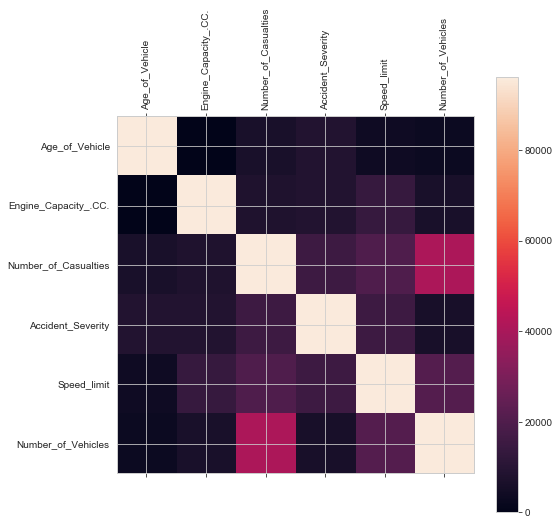

In [111]:
plot_corr(df, 'Age_of_Vehicle', 'Engine_Capacity_.CC.', 'Number_of_Casualties',
                 'Accident_Severity','Speed_limit','Number_of_Vehicles')

In [109]:
def get_redundant_pairs(df):
    '''Get diagonal and lower triangular pairs of correlation matrix'''
    pairs_to_drop = set()
    cols = df.columns
    for i in range(0, df.shape[1]):
        for j in range(0, i+1):
            pairs_to_drop.add((cols[i], cols[j]))
    return pairs_to_drop

def get_top_abs_correlations(df, n=5):
    au_corr = df.corr().abs().unstack()
    labels_to_drop = get_redundant_pairs(df)
    au_corr = au_corr.drop(labels=labels_to_drop).sort_values(ascending=False)
    print(au_corr[0:n])
    return au_corr[0:n]

def print_corr(df2):
    print("Top Absolute Correlations: ")
    get_top_abs_correlations(df2, 3)

print_corr(df2)

Top Absolute Correlations: 
Number_of_Casualties  Number_of_Vehicles    0.382233
Speed_limit           Number_of_Vehicles    0.161661
Number_of_Casualties  Speed_limit           0.148506
dtype: float64
